#Sales Forecasting in a Logistic Company: A Deep Learning Approach

This project aims to predict the daily demand of sales of a Brazilian Logistic Company. We use the information of the last 5 days of sales, for estimate the next daily sales. The data includes 60 days of the company operations. Also, it includes various features as the date and the sub classification of sales (non-urgent, urgent, type A, type B, type C).

For modeling this phenomenon, we use Artificial Neural Networks (ANN). Specifically, we use a Multi-Layer Perceptron (MLP) as a baseline model. On the other hand, we use a Long Short-Term Memory (LSTM) Neural Network for trying to beating the performance of the baseline. The former Neural Network is very useful when we dealing with temporal data such as this dataset.

Sales Forecasting is a typical operation management problem. Traditional approaches (time series forecasting) might include Econometrics and Statistical models such as SMA, ARIMA etc. Although in real application these techniques work fairly well, it is worth exploring new approaches such the present, in order to improve the accuracy of the forecasting and enhancing the operational planning. 

###Content:
###1. Getting started
###2. Function for split the squences
###3. Data exploration
###4. Artificial Neural Networks (ANN)
###5. Long Short-Term Memory (LSTM) Neural Networks

#1. Getting started

In [0]:
#Libraries

#Data wrangling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Upgrading Keras
pip install -U keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [3]:
#Keras models 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.utils import plot_model
from keras.utils import model_to_dot
from keras.layers import LSTM

Using TensorFlow backend.


In [0]:
#Displaying images in the notebook 
from IPython.display import Image 

#2. Function for split the sequences

In [0]:
# This function is used for split a univariate sequence into samples
def split_sequence(sequence, n_steps):

	X, y = list(), list()
 
	for i in range(len(sequence)):
		end_ix = i + n_steps

		if end_ix > len(sequence)-1:
			break
			
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	
	return np.array(X), np.array(y)

#3. Data exploration

In [0]:
#Importing the dataset
url_dataset = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/sales%20forecasting_final.csv"

In [0]:
#Reading the dataset
dataset = pd.read_csv(url_dataset, sep = ",", header = None, names = ["Month", "Week", "Day", "Non-Urgent", "Urgent", "Type A", "Type B", "Type C", "Fiscal", "Traffic Controller", "Banking 1", "Banking 2", "Banking 3", "Sales"])

In [8]:
#Showing the dataset
dataset.head()

,Month,Week,Day,Non-Urgent,Urgent,Type A,Type B,Type C,Fiscal,Traffic Controller,Banking 1,Banking 2,Banking 3,Sales
0,1.0,1,4,316307,223270,61543,175586,302448,0,65556,44914,188411,14793,539577
1,1.0,1,5,128633,96042,38058,56037,130580,0,40419,21399,89461,7679,224675
2,1.0,1,6,43651,84375,21826,25125,82461,1386,11992,3452,21305,14947,129412
3,1.0,2,2,171297,127667,41542,113294,162284,18156,49971,33703,69054,18423,317120
4,1.0,2,3,90532,113526,37679,56618,116220,6459,48534,19646,16411,20257,210517


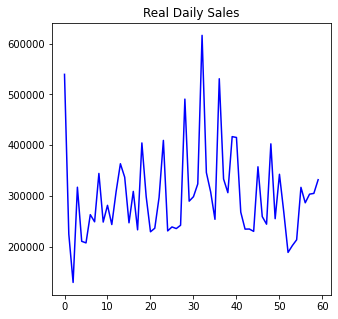

In [9]:
#Plotting the target
dataset["Sales"].plot(kind="line", color = "blue", figsize = (5,5), title = "Real Daily Sales")

#4. Artificial Neural Networks (ANN)

#4.1 Preprocessing

In [0]:
#Input of the function
sequence_MLP = dataset["Sales"]

#Input of the function
steps_MLP = 5

#Spliting the sequence in the right format
X_MLP, y_MLP = split_sequence(sequence = sequence_MLP, n_steps = steps_MLP)

In [0]:
#Splitting the dataset in training and test
X_train_MLP = X_MLP[:45,:]
X_test_MLP = X_MLP[45:,:]

In [0]:
#Splitting the dataset in training and test
y_train_MLP = y_MLP[:45]
y_test_MLP = y_MLP[45:]

In [0]:
#Scaler for standarzing with mean and bias
scaler_MLP = StandardScaler()

In [14]:
#Using just the training set
scaler_MLP.fit(X_train_MLP)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Applying the transformation in training and test set
X_train_MLP = scaler_MLP.transform(X_train_MLP)
X_test_MLP  = scaler_MLP.transform(X_test_MLP)

In [0]:
#Reshaping in: (samples, timesteps, features)
X_train_MLP = X_train_MLP.reshape(45,5,1)
X_test_MLP = X_test_MLP.reshape(10,5,1)

#4.2 Modeling: Multi-Layer Perceptron (MLP)

In [0]:
#Multi-Layer perceptron model
model_MLP = Sequential()
model_MLP.add(Dense(200, activation="relu", input_shape=(5,1)))
model_MLP.add(Dense(200, activation="relu"))
model_MLP.add(Flatten())
model_MLP.add(Dense(1))

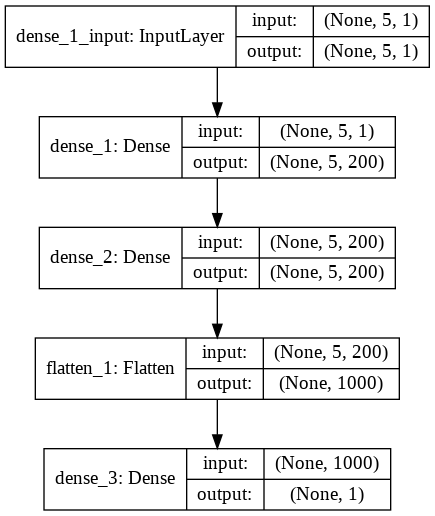

In [18]:
#Plotting the MLP
plot_model(model_MLP, to_file="MLP.png", expand_nested=False, rankdir="TB", show_shapes=True) 

In [0]:
#Compiling the MLP
model_MLP.compile(optimizer="rmsprop", loss="mean_squared_logarithmic_error", metrics=["mae"])

In [20]:
#Fitting the MLP with the training data
history_MLP = model_MLP.fit(X_train_MLP, y_train_MLP, epochs=200, batch_size = 1, verbose=1)

Epoch 1/200
45/45 [==============================] - 0s 10ms/step - loss: 128.9080 - mae: 308266.5000
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 87.5040 - mae: 308242.0312
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 64.5710 - mae: 308168.8125
Epoch 4/200
45/45 [==============================] - 0s 2ms/step - loss: 49.8665 - mae: 308004.4688
Epoch 5/200
45/45 [==============================] - 0s 2ms/step - loss: 39.6970 - mae: 307708.6250
Epoch 6/200
45/45 [==============================] - 0s 2ms/step - loss: 32.2604 - mae: 307228.5938
Epoch 7/200
45/45 [==============================] - 0s 2ms/step - loss: 26.5988 - mae: 306515.1875
Epoch 8/200
45/45 [==============================] - 0s 2ms/step - loss: 22.1630 - mae: 305530.1875
Epoch 9/200
45/45 [==============================] - 0s 2ms/step - loss: 18.6038 - mae: 304205.5000
Epoch 10/200
45/45 [==============================] - 0s 3ms/step - loss: 15.6996 - mae: 302506.34

In [21]:
#Showing the parameters computed
model_MLP.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5, 200)            400       
_________________________________________________________________
dense_2 (Dense)              (None, 5, 200)            40200     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1001      
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
_________________________________________________________________


#4.3 Results

In [22]:
#Get the accuracy scores
score_MLP = model_MLP.evaluate(X_test_MLP, y_test_MLP)
print("\n")
print("The scores are: ")
print(score_MLP)
print("\n")

#Get the names of the metrics
names_MLP = model_MLP.metrics_names
print("The name of the previous scores are: ")
print(names_MLP)
print("\n")

#Get the predictions
prediction_MLP = model_MLP.predict(X_test_MLP)
print("Predictions of the model: ")
print(prediction_MLP)

10/10 [==============================] - 0s 2ms/step


The scores are: 
[0.045528262853622437, 44918.67578125]


The name of the previous scores are: 
['loss', 'mae']


Predictions of the model: 
[[285724.62]
 [285668.06]
 [285950.5 ]
 [285214.3 ]
 [283848.03]
 [283378.72]
 [283118.97]
 [283290.84]
 [284209.75]
 [285163.25]]


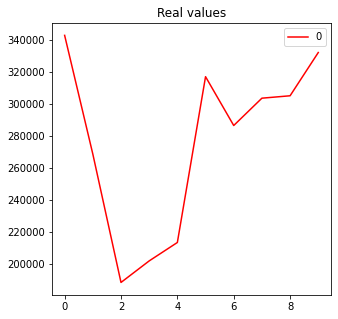

In [23]:
#Plotting the real sales 
real_MLP = pd.DataFrame(data = y_test_MLP)
real_MLP.plot(kind = "line", color = "red", title = "Real values", figsize = (5,5))

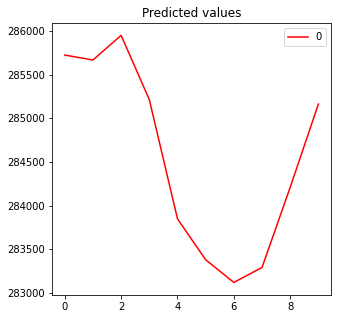

In [24]:
#Plotting the predicted sales
predicted_MLP = pd.DataFrame(data = prediction_MLP)
predicted_MLP.plot(kind = "line", color = "red", title = "Predicted values", figsize = (5,5))

#5. Long Short-Term Memory (LSTM) Neural Networks

#5.1 Preprocessing

In [0]:
#Input of the function
sequence_LSTM = dataset["Sales"]

#Input of the function
steps_LSTM = 5

#Spliting the sequence in the right format
X_LSTM, y_LSTM = split_sequence(sequence = sequence_LSTM, n_steps = steps_LSTM)

In [0]:
#Splitting the dataset in training and test
X_train_LSTM = X_LSTM[:45,:]
X_test_LSTM = X_LSTM[45:,:]

In [0]:
#Splitting the dataset in training and test
y_train_LSTM = y_LSTM[:45]
y_test_LSTM = y_LSTM[45:]

In [0]:
#Scaler for standarzing with mean and bias
scaler_LSTM = StandardScaler()

In [29]:
#Using just the training set
scaler_LSTM.fit(X_train_LSTM)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
#Applying the transformation in training and test set
X_train_LSTM = scaler_LSTM.transform(X_train_LSTM)
X_test_LSTM  = scaler_LSTM.transform(X_test_LSTM)

In [0]:
#Reshaping in: (samples, timesteps, features)
X_train_LSTM = X_train_LSTM.reshape(45,5,1)
X_test_LSTM = X_test_LSTM.reshape(10,5,1)

#5.2 Modeling: LSTM Neural Networks

In [0]:
#LSTM model
model_LSTM = Sequential()
model_LSTM.add(LSTM(100, activation="relu", return_sequences=True, input_shape = (5,1)))
model_LSTM.add(LSTM(60, activation="relu", return_sequences=True, input_shape = (5,1)))
model_LSTM.add(LSTM(30, activation="relu", return_sequences=True, input_shape = (5,1)))
model_LSTM.add(LSTM(15, activation="relu", return_sequences=False, input_shape = (5,1)))
model_LSTM.add(Dense(1))

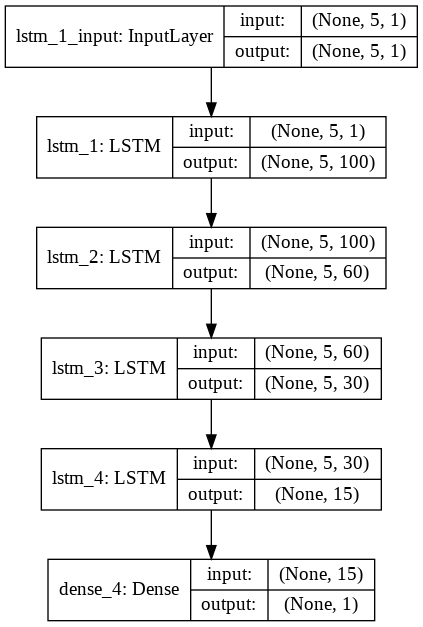

In [33]:
#Plotting the LSTM
plot_model(model_LSTM, to_file="LSTM.png", expand_nested=False, rankdir="TB", show_shapes=True) 

In [0]:
#Compiling the LSTM
model_LSTM.compile(optimizer="rmsprop", loss="mean_squared_logarithmic_error", metrics=["mae"])

In [35]:
#Fitting the MLP with the training data
history_LSTM = model_LSTM.fit(X_train_LSTM, y_train_LSTM, epochs=400, batch_size = 1, verbose=1)

Epoch 1/400
45/45 [==============================] - 3s 56ms/step - loss: 108.4070 - mae: 308163.4688
Epoch 2/400
45/45 [==============================] - 2s 37ms/step - loss: 18.5685 - mae: 300038.1250
Epoch 3/400
45/45 [==============================] - 2s 37ms/step - loss: 2.0030 - mae: 201952.3125
Epoch 4/400
45/45 [==============================] - 2s 37ms/step - loss: 0.1452 - mae: 97017.4688
Epoch 5/400
45/45 [==============================] - 2s 37ms/step - loss: 0.1449 - mae: 98110.0547
Epoch 6/400
45/45 [==============================] - 2s 36ms/step - loss: 0.1232 - mae: 88607.9297
Epoch 7/400
45/45 [==============================] - 2s 36ms/step - loss: 0.1148 - mae: 86432.9297
Epoch 8/400
45/45 [==============================] - 2s 37ms/step - loss: 0.1087 - mae: 83783.6797
Epoch 9/400
45/45 [==============================] - 2s 37ms/step - loss: 0.0977 - mae: 78002.3125
Epoch 10/400
45/45 [==============================] - 2s 37ms/step - loss: 0.0954 - mae: 78671.5703
Epo

In [36]:
#Showing the parameters computed
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 100)            40800     
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 60)             38640     
_________________________________________________________________
lstm_3 (LSTM)                (None, 5, 30)             10920     
_________________________________________________________________
lstm_4 (LSTM)                (None, 15)                2760      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 93,136
Trainable params: 93,136
Non-trainable params: 0
_________________________________________________________________


#5.3 Results

In [37]:
#Get the accuracy scores
score_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM)
print("\n")
print("The scores are: ")
print(score_LSTM)
print("\n")

#Get the names of the metrics
names_LSTM = model_LSTM.metrics_names
print("The name of the previous scores are: ")
print(names_LSTM)
print("\n")

#Get the predictions
prediction_LSTM = model_LSTM.predict(X_test_LSTM)
print("Predictions of the model: ")
print(prediction_LSTM)

10/10 [==============================] - 0s 15ms/step


The scores are: 
[0.06594711542129517, 56142.36328125]


The name of the previous scores are: 
['loss', 'mae']


Predictions of the model: 
[[296264.97]
 [278334.28]
 [313872.47]
 [300721.66]
 [299607.75]
 [294944.47]
 [262718.88]
 [249050.33]
 [256896.22]
 [284629.7 ]]


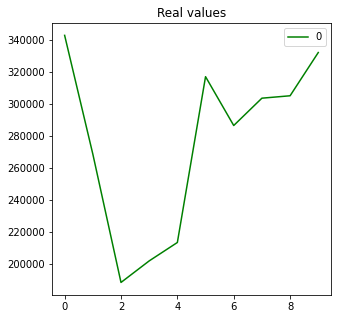

In [38]:
#Plotting the real sales 
real_LSTM = pd.DataFrame(data = y_test_LSTM)
real_LSTM.plot(kind = "line", color = "green", title = "Real values", figsize = (5,5))

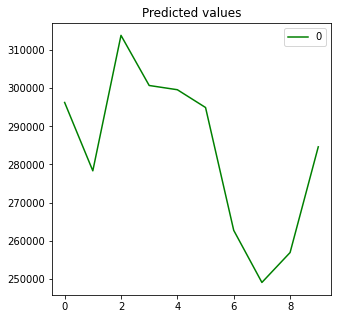

In [39]:
#Plotting the real sales 
predicted_LSTM = pd.DataFrame(data = prediction_LSTM)
predicted_LSTM.plot(kind = "line", color = "green", title = "Predicted values", figsize = (5,5))